In [ ]:
from IPython.display import Image
#Image("graph_embedding.png")

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install word2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=143975 sha256=f817080ef6dc72398478a327d0316aa1cc9da1fec41dad43434a1a9ce4a4d282
  Stored in directory: /root/.cache/pip/wheels/6a/fa/d1/e03e8c10e0e2aa5c7b6e2b46b4a1c715d140283853937bb4b1
Successfully built word2vec


In [ ]:
  !pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
!pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
edge_list=pd.read_csv('my_data.csv')

In [ ]:
edge_list.head()

,node_1,neighbor_1,type_1
0,10.1016/S0031-9422(00)00477-5,Nectandrin B,doi_name
1,10.1515/znc-2009-11-1212,8-methoxymellein,doi_name
2,10.1016/S0031-9422(00)00226-0,"10,11-dihydropiperine; Δα,β-dihydropiperine",doi_name
3,10.1021/jf063451x,"21´-(3,4-Methylenedioxyphenyl)-henicosanoic acid",doi_name
4,10.1155/2013/835081,urauchimycin A,doi_name


In [ ]:
edge_list = edge_list.applymap(str)

In [ ]:
# create undirected graph from the edgelist
G=nx.from_pandas_edgelist(edge_list, source='node_1', target='neighbor_1', create_using=nx.Graph())

In [ ]:
G.nodes

NodeView(('10.1016/S0031-9422(00)00477-5', 'Nectandrin B', '10.1515/znc-2009-11-1212', '8-methoxymellein', '10.1016/S0031-9422(00)00226-0', '10,11-dihydropiperine; Δα,β-dihydropiperine', '10.1021/jf063451x', '21´-(3,4-Methylenedioxyphenyl)-henicosanoic acid', '10.1155/2013/835081', 'urauchimycin A', '10.1002/ps.1278', '20-hydroxyecdysone; polypodine A', '10.1023/A:1025694720727', 'germacrene D', '10.1080/14786410600907002', 'citrusinine-I', '10.2174/187152010794728620', '22-hydroxytirucalla-7,24-diene-2,3-dione', 'Cyclo-(L-Pro-L-Val)', '10.1021/np030530j', 'Piperaduncine B', '4,5-dihydropiperyline', '10.1590/S0100-40422005000400009', '3-O-β-D-quinovopyranosyl cincholic acid', '10.1021/np50086a012', 'Cusculine; 1,2,3,5,6-pentamethoxy-9-acridone', '10.1107/S160053680302107X', '5,7-dimethoxy-2,2-dimethyl-2H-1-benzopyran-6-propanoic acid', '10.1590/S0102-695X2007000300003', 'Amentoflavone', '10.1002/jobm.200800093', '(22E,24R)-ergosta-4,6,8(14),22-tetraen-3-one', '10.1016/S0031-9422(99)001

In [ ]:
# function to generate random walk sequences of nodes for a particular node
def get_random_walk(node, walk_length):
    
    random_walk_length = [node]
    
    for i in range(walk_length-1):
        neighbors = list(G.neighbors(node))
        neighbors = list(set(neighbors) - set(random_walk_length))    
        if len(neighbors) == 0:
            break
        random_neighbor = random.choice(neighbors)
        random_walk_length.append(random_neighbor)
        node = random_neighbor
        
    return random_walk_length

In [ ]:
# create undirected graph from the edgelist
edge_list = edge_list.applymap(str) 
# create undirected graph from the edgelist
G = nx.from_pandas_edgelist(edge_list, source='node_1', target='type_1', create_using=nx.Graph()) 

def get_random_walk(node, walk_length):
  
    random_walk_length = [node]
    
    for i in range(walk_length-1):
        # list of neighbors
        neighbors = list(G.neighbors(node))
        neighbors = list(set(neighbors) - set(random_walk_length))    
        if len(neighbors) == 0:
            break
        random_neighbor = random.choice(neighbors)
        random_walk_length.append(random_neighbor)
        node = random_neighbor
        
    return random_walk_length

from gensim.models import Word2Vec
sentences = []
for node in G.nodes():

    walks = [get_random_walk(node, walk_length=10) for _ in range(5)]
    sentences += walks
    
model = Word2Vec(sentences, window=4, sg=1, hs=0,
                 negative=10, # for negative sampling
                 alpha=0.03, min_alpha=0.0, #reduce alpha value as per requirement
                 seed=14)

model.build_vocab(sentences, progress_per=2)

model.train(sentences, total_examples=model.corpus_count, epochs=20, report_delay=1)



(67420, 146200)

In [ ]:

all_nodes = list(G.nodes())
number_of_random_walks = 5
random_walks = []

for node in tqdm(all_nodes):

    for i in range(number_of_random_walks):
        random_walks.append(get_random_walk(node, 10))

100%|██████████| 147/147 [00:00<00:00, 3569.12it/s]


In [ ]:
# check random walk for node '2'
get_random_walk('10.1590/S0103-50532003000300007', 10)

['10.1590/S0103-50532003000300007', "3,5,6,7,3',4',5'-heptamethoxyflavonol"]

In [ ]:
for node, _ in model.wv.most_similar('10.1590/S0103-50532003000300007'):
    print((node, _))

('10.1590/S0100-40422006000300016', 0.9937681555747986)
('10.1016/S0031-9422(97)00598-0', 0.9931910037994385)
('10.1002/hlca.200890147', 0.9931735396385193)
('10.1016/j.cbi.2010.08.008', 0.9929312467575073)
('10.1021/np049863m', 0.992647111415863)
('10.1248/cpb.56.407', 0.9925318360328674)
('10.1016/j.phytochem.2005.04.043', 0.9925289750099182)
('10.1021/jf00030a035', 0.9924951791763306)
('10.3390/molecules190812031', 0.9922819137573242)
('10.1055/s-0034-1368301', 0.992266058921814)


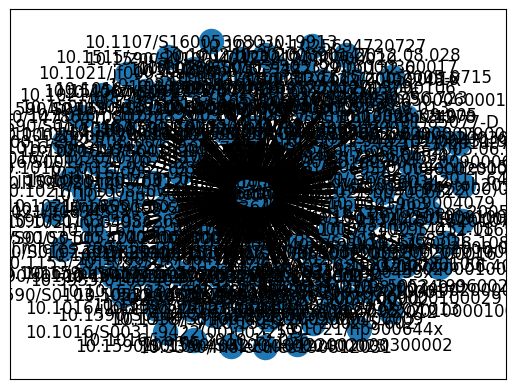

In [ ]:
nx.draw_networkx(G)

In [ ]:
# using prinicpal component analysis
def plot_nodes(word_list):
    X = model.wv[word_list]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

In [ ]:
numbers = list(G.nodes)

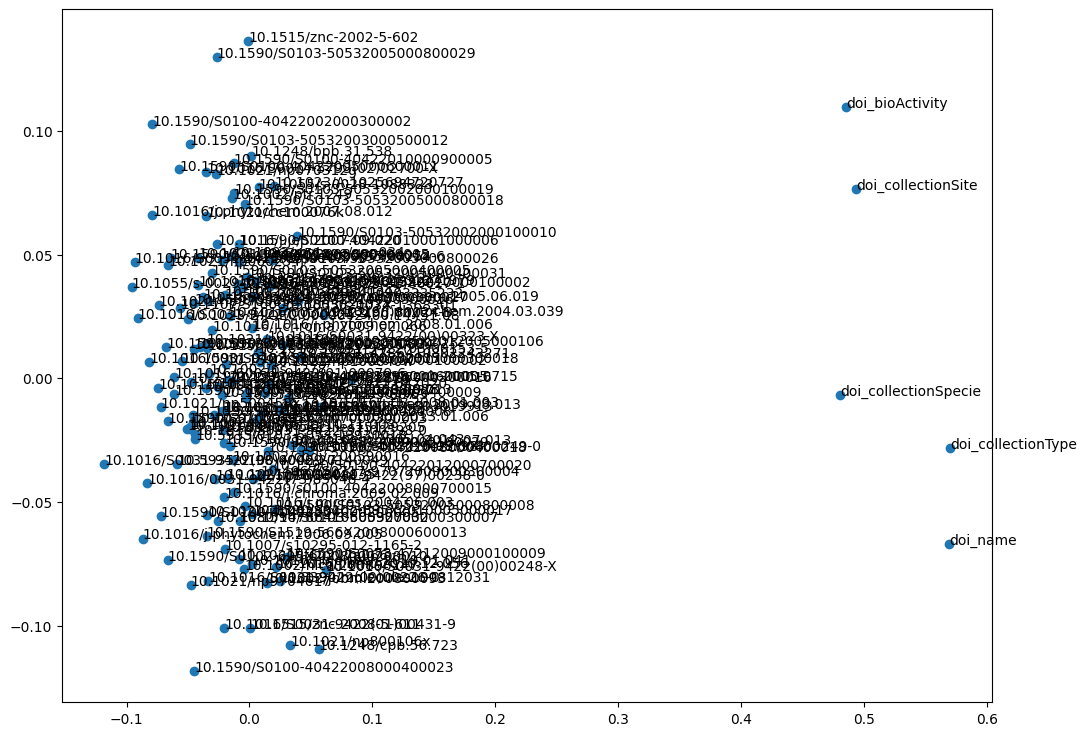

In [ ]:
plot_nodes(numbers)

In [ ]:
# code for hits@k
node2idx = {node: idx for idx, node in enumerate(model.wv.index_to_key)}


def calculate_hits_k(k):
    hits = 0
    total_nodes = len(G.nodes())
    for node in G.nodes():
        
        node_idx = node2idx[node]
        
        node_vec = model.wv[node]
        
        cos_sims = model.wv.cosine_similarities(node_vec, model.wv.vectors)
        
        top_k_idxs = cos_sims.argsort()[::-1][1:k+1]
        top_k_nodes = [model.wv.index_to_key[idx] for idx in top_k_idxs]
        for neighbor in G.neighbors(node):
            if neighbor in top_k_nodes:
                hits += 1
    hits_at_k = hits / (total_nodes * k)
    return hits_at_k


k_values = [1, 2, 3,4,5]
for k in k_values:
    hits_at_k = calculate_hits_k(k)
    print(f"Hits@{k}: {hits_at_k:.4f}")


Hits@1: 0.0000
Hits@2: 0.0000
Hits@3: 0.0000
Hits@4: 0.0000
Hits@5: 0.0068


In [ ]:
!pip install weighted-metapath2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec

In [ ]:

edge_list.head()

,node_1,neighbor_1,type_1
0,10.1016/S0031-9422(00)00477-5,Nectandrin B,doi_name
1,10.1515/znc-2009-11-1212,8-methoxymellein,doi_name
2,10.1016/S0031-9422(00)00226-0,"10,11-dihydropiperine; Δα,β-dihydropiperine",doi_name
3,10.1021/jf063451x,"21´-(3,4-Methylenedioxyphenyl)-henicosanoic acid",doi_name
4,10.1155/2013/835081,urauchimycin A,doi_name


In [ ]:
edge_list.rename(columns = {0:'source', 2: 'target'}, inplace = True)

In [ ]:
G=nx.from_pandas_edgelist(edge_list, source='node_1', target='type_1', create_using=nx.Graph())

In [ ]:
node2vec = Node2Vec(G, dimensions=128, walk_length=40, num_walks=100, workers=2)

Computing transition probabilities:   0%|          | 0/147 [00:00<?, ?it/s]

In [ ]:
model = node2vec.fit(window=10, min_count=1)

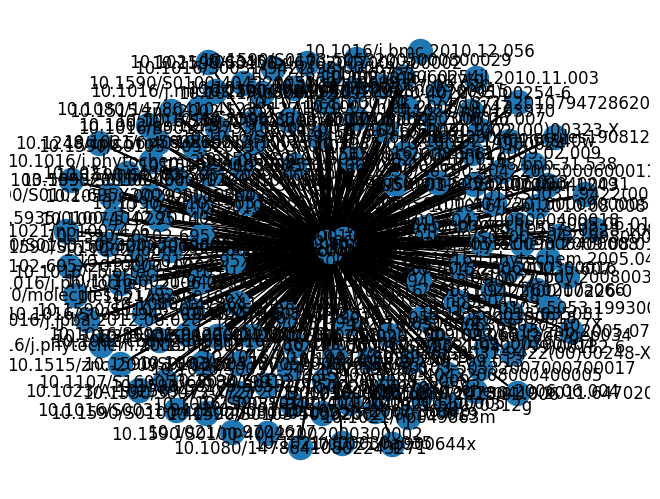

In [ ]:
# verify the most similar nodes generated by node2vec from the graph
nx.draw(G, with_labels=True)
plt.show()
largest_cc = sorted(nx.connected_components(G), key=len, reverse=True)[:]
subgraph = G.subgraph(set().union(*largest_cc))


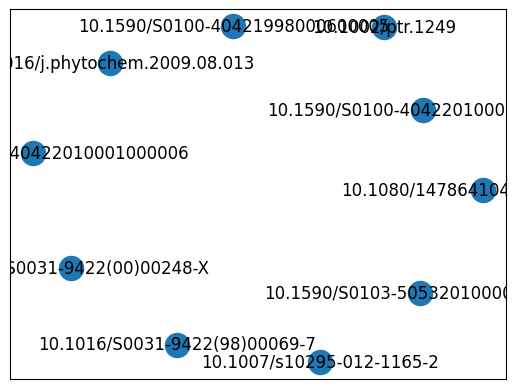

In [ ]:
# change the node ID order to get knowldge garph
similar_nodes = model.wv.most_similar('10.1021/np50086a012', topn=10)
node_ids = [node_id for node_id, _ in similar_nodes]
subgraph = G.subgraph(node_ids)
nx.draw_networkx(subgraph)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


# Step 1: Create node2idx dictionary
node2idx = {node: idx for idx, node in enumerate(model.wv.index_to_key)}

# Step 2: Define function to calculate Hits@K
def calculate_hits_k(k):
    hits_k = 0
    for node in subgraph.nodes():
        neighbors = [n for n in subgraph.neighbors(node)]
        if len(neighbors) < k:
            continue
        node_idx = node2idx[node]
        neighbor_indices = [node2idx[n] for n in neighbors]
        similarity_scores = cosine_similarity([model.wv[node_idx]], model.wv[neighbor_indices])
        top_k_indices = np.argsort(similarity_scores, axis=1)[0][-k:]
        top_k_neighbors = [neighbors[i] for i in top_k_indices]
        hits_k += int(node in top_k_neighbors)
    return hits_k / len(subgraph)

# Step 3: Calculate Hits@K for k=1,2,3,4,5
for k in range(1, 10):
    hits_k = calculate_hits_k(k)
    print(f"Hits@{k}: {hits_k:.4f}")


Hits@1: 0.0000
Hits@2: 0.0000
Hits@3: 0.0000
Hits@4: 0.0000
Hits@5: 0.0000
Hits@6: 0.0000
Hits@7: 0.0000
Hits@8: 0.0000
Hits@9: 0.0000


In [ ]:
#for downloading constructed knowledge graph
import pickle

# Save the graph
with open("knowledge_graph1.pickle", "wb") as f:
    pickle.dump(G, f)

# Load the graph
with open("knowledge_graph1.pickle", "rb") as f:
    G = pickle.load(f)
